In [1]:
#Packages import
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
import math
import astropy.units as u

C:\Users\Nick Landing\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\config\__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to C:\Users\Nick Landing\.lightkurve\cache. Please move all the files in the legacy directory C:\Users\Nick Landing\.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [37]:
# Search for your target using its TIC ID 
TIC = 'TIC 72331' 

In [38]:
# Check the availability of the data for this target
available_data_all = lk.search_lightcurve(TIC);

In [29]:
available_data_all

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 11,2019,SPOC,120,68904,0.0
1,TESS Sector 11,2019,TESS-SPOC,1800,68904,0.0
2,TESS Sector 38,2021,TESS-SPOC,600,68904,0.0
3,TESS Sector 65,2023,TESS-SPOC,200,68904,0.0
4,TESS Sector 11,2019,QLP,1800,68904,0.0
5,TESS Sector 38,2021,QLP,600,68904,0.0
6,TESS Sector 65,2023,QLP,200,68904,0.0


In [30]:
# Search for and download the light curve
search_result = lk.search_lightcurve(TIC, sector=11, author="SPOC")
sector1b = search_result.download_all()
sector1 = sector1b.stitch().remove_nans()

# Search for and download the light curve
search_result = lk.search_lightcurve(TIC, sector=65, author="TESS-SPOC")
sector2b = search_result.download_all()
sector2 = sector2b.stitch().remove_nans()

# Search for and download the light curve
search_result = lk.search_lightcurve(TIC, sector=38, author="QLP")
sector3b = search_result.download_all()
sector3 = sector3b.stitch().remove_nans()

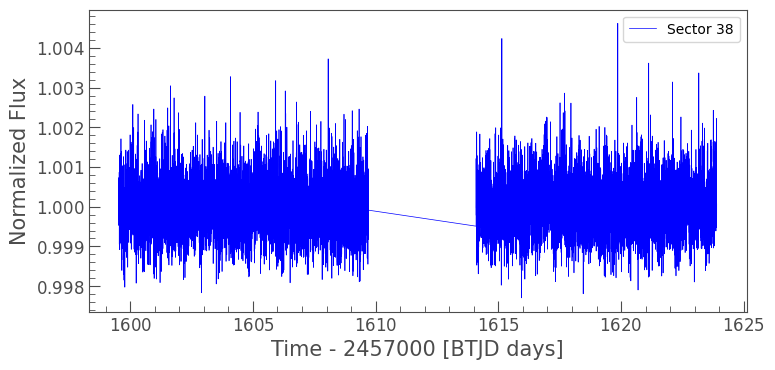

In [31]:
# Plot the light curves with the desired colors and highlighted sectors
ax =sector1.plot(label='Sector 38', color='blue');
%matplotlib inline
ax.legend();

In [32]:
collect_lc = lk.LightCurveCollection([sector1,sector2,sector3]).stitch();

C:\Users\Nick Landing\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\collections.py:213: LightkurveWarning: The following columns will be excluded from stitching because the column types are incompatible: {'sap_bkg_err', 'sap_flux', 'sap_bkg'}
  warnings.warn(


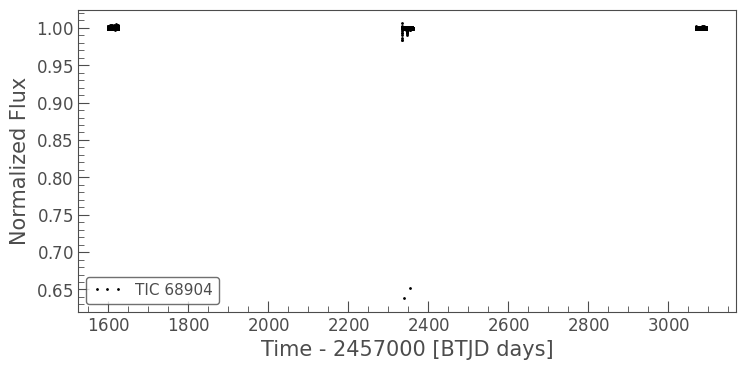

In [33]:
collect_lc.plot(color = 'black', lw = 0, marker = '.');

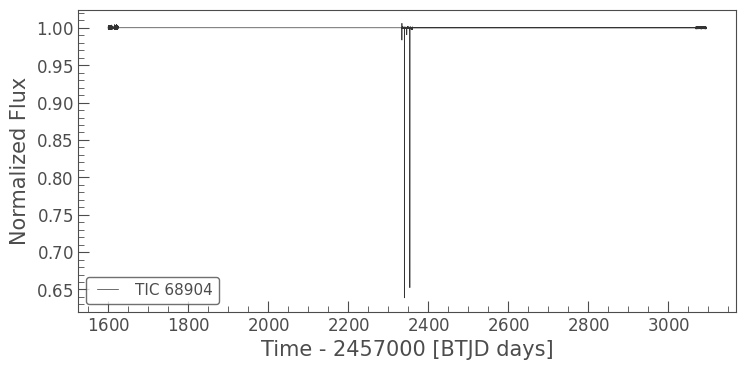

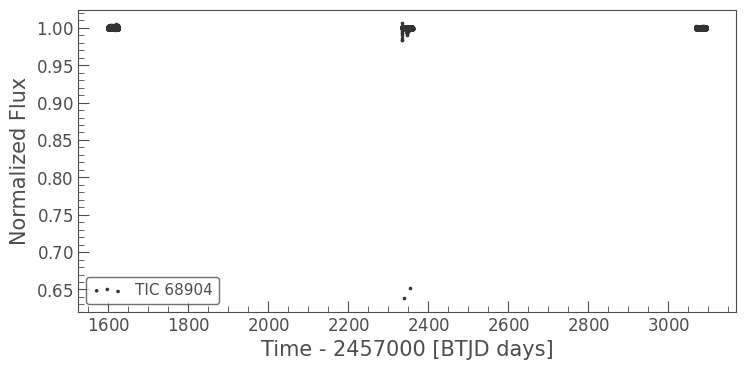

In [34]:
mask = (collect_lc.time.value < 3100)&(collect_lc.time.value > 1)
masked_lc=collect_lc[mask];
masked_lc.plot();
masked_lc.scatter(s=10);


In [35]:
#Querying if there is a solar system object in the first half
df_sso1 = masked_lc.query_solar_system_objects(cadence_mask=(masked_lc.time.value >= 3500) & (masked_lc.time.value <= 1)) 
print(df_sso1)

None


`period` contains 4383766 points.Periodogram is likely to be large, and slow to evaluate. Consider setting `frequency_factor` to a higher value.


Period at max power = 13.720920920920923 d
BLS max power = 307.6094412304306
Epoch = 1612.86862726548
----------------------------------------
Period at second max power = 13.741541541541544 d
BLS max power = 634.6755528844847
Epoch = 1611.75362726548
----------------------------------------
Period at third max power = 13.24664664664665 d
BLS max power = 490.72294792355217
Epoch = 1611.47362726548
----------------------------------------
Period at fourth max power = 13.473473473473476 d
BLS max power = 1270.3794527541643
Epoch = 1612.45362726548
----------------------------------------
Period at fifth max power = 15.782982982982986 d
BLS max power = 298.8715139708829
Epoch = 1614.01362726548
----------------------------------------
Period at sixth max power = 16.525325325325326 d
BLS max power = 403.59768461684314
Epoch = 1612.91362726548
----------------------------------------
Period at seventh max power = 14.25705705705706 d
BLS max power = 477.74252003597775
Epoch = 1612.9186272654

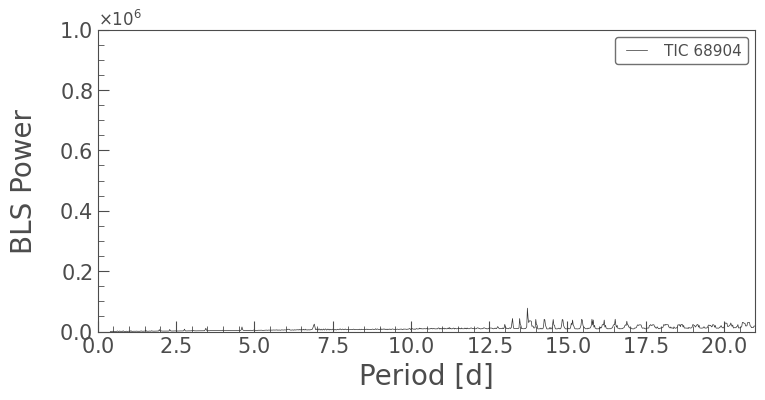

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Assume masked_lc is the light curve object with any NaNs removed.
period = np.linspace(0.4, 21, 1000)
bls = masked_lc.to_periodogram(method='bls', period=period,frequency_factor=25)

# Plot the periodogram
bls.plot()
plt.ylabel('BLS Power', fontsize=20, labelpad=15)
plt.xlabel('Period [d]', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0, 21)
plt.ylim([0, 1000000])

# Find the periods and powers sorted by power
powers = bls.power
periods = bls.period
epoch = bls.transit_time
sorted_indices = np.argsort(powers)[::-1]
sorted_powers = powers[sorted_indices]
sorted_periods = periods[sorted_indices]
sorted_epoch = epoch[sorted_indices]

# Print the periods and powers of the highest and second highest peaks
#Reasoning behind 9 is that is the most confirmed and unconfirmed planets of a solar system (the Sun's solar system)
print('Period at max power =', periods[np.argmax(powers)])
print('BLS max power =', np.max(powers[0]))
print('Epoch =', sorted_epoch[0])
print('----------------------------------------')
print('Period at second max power =', sorted_periods[1])
print('BLS max power =', np.max(powers[1]))
print('Epoch =', sorted_epoch[1])
print('----------------------------------------')
print('Period at third max power =', sorted_periods[2])
print('BLS max power =', np.max(powers[2]))
print('Epoch =', sorted_epoch[2])
print('----------------------------------------')
print('Period at fourth max power =', sorted_periods[3])
print('BLS max power =', np.max(powers[3]))
print('Epoch =', sorted_epoch[3])
print('----------------------------------------')
print('Period at fifth max power =', sorted_periods[4])
print('BLS max power =', np.max(powers[4]))
print('Epoch =', sorted_epoch[4])
print('----------------------------------------')
print('Period at sixth max power =', sorted_periods[5])
print('BLS max power =', np.max(powers[5]))
print('Epoch =', sorted_epoch[5])
print('----------------------------------------')
print('Period at seventh max power =', sorted_periods[6])
print('BLS max power =', np.max(powers[6]))
print('Epoch =', sorted_epoch[6])
print('----------------------------------------')
print('Period at eighth max power =', sorted_periods[7])
print('BLS max power =', np.max(powers[7]))
print('Epoch =', sorted_epoch[7])
print('----------------------------------------')
print('Period at ninth max power =', sorted_periods[8])
print('BLS max power =', np.max(powers[8]))
print('Epoch =', sorted_epoch[8])
print('----------------------------------------')
#Choose which power you want done here
print('Period at Fifteenth max power =', sorted_periods[14])
print('BLS max power =', np.max(powers[14]))
print('Epoch =', sorted_epoch[14])
print('----------------------------------------')

(0.97, 1.01)

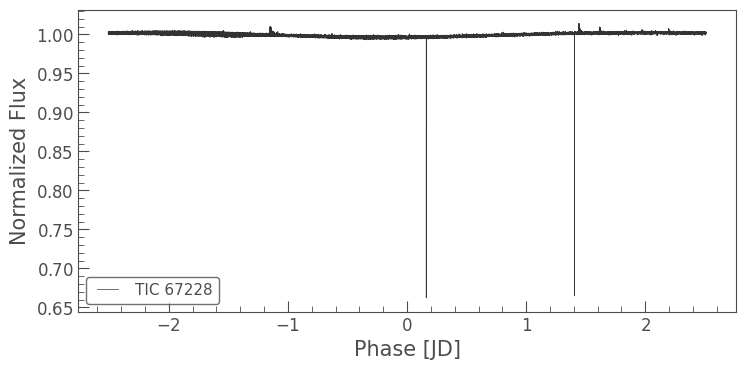

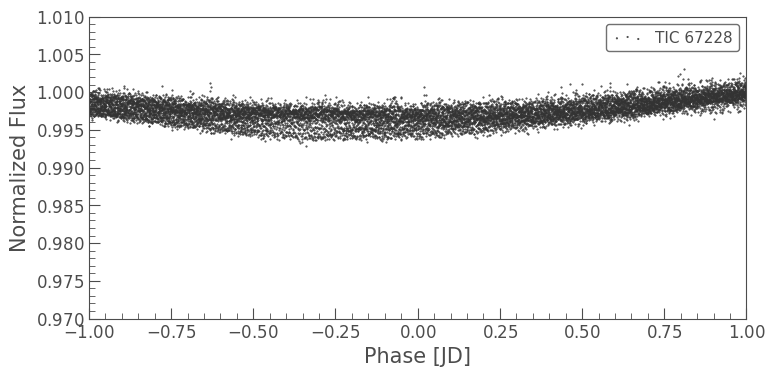

In [26]:
#Here we will fold the lightcurve based on the period and the epoch time we found earlier.
#After folding your light curve you should see a signal (transit) on phase 0.
period = 5.01901901901902
epoch_time = 1600.8286888668804
folded_lc = masked_lc.fold(period, epoch_time=epoch_time)
folded_lc.plot();
folded_lc.scatter(s=1);
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-1,1)
plt.ylim([0.970,1.01])

(0.976, 1.005)

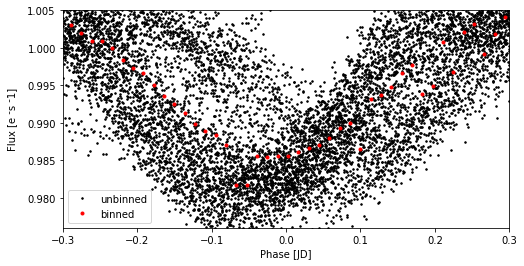

In [163]:
period  = period
t0 = epoch_time

folded2_lc = masked_lc.fold(period, epoch_time=epoch_time)

#Bin the folded lightcurve. Here we bin at 30 minutes.
folded2_lc_binned = folded_lc.bin(5/24/15)

fig, ax = plt.subplots(figsize = (8,4))

folded2_lc.plot(ax = ax, marker = '.', linewidth = 0, color = 'black', alpha = 1, markersize = 3)
folded2_lc_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'red', alpha = 1, markersize = 3)
plt.legend(labels= ['unbinned', 'binned'], fontsize=10)
plt.ylabel('Flux [e ־s ־1]', fontsize=10, labelpad=10)
plt.xlabel('Phase [JD]', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-0.3,0.3)
plt.ylim([0.976,1.005])

In [164]:
min = np.nanmin(folded2_lc_binned.flux) #Minimum flux of the binned lightcurve
print('Minimum flux = ', min)
median = np.nanmedian(folded2_lc_binned.flux) #Median flux of the binned lightcurve. The median flux should be equal to 1.
print('median flux =', median)
Tdepth = median - min
print('Tdepth = ', Tdepth)
print('Tdepth in ppm = ', Tdepth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio) #Exoplanet's radius and Star's radius ratio.

Minimum flux =  0.9816665053367615
median flux = 1.001174807548523
Tdepth =  0.019508302211761475
Tdepth in ppm =  19508.302211761475 ppm
Rp/Rs ratio =  0.1396721239609446


In [165]:
planet_b_period = period
planet_b_t0 = epoch_time
planet_b_dur = bls.duration[0]
print(planet_b_period)
print(planet_b_t0)
print(planet_b_dur)

2.0084084084084086
1598.483050192122
0.1 d


In [166]:
planet_b_dur
print('Transit duration in hours=', planet_b_dur*24, 'hours')

Transit duration in hours= 2.4000000000000004 d hours


In [167]:
#Transit depth from bls model
planet_b_depth = bls.depth[0]
print('depth = ', planet_b_depth)
print('depth in ppm =', planet_b_depth * (10**6), 'ppm')

depth =  0.0002729790953370122
depth in ppm = 272.97909533701215 ppm


In [27]:
P = planet_b_period * 24 * 60 * 60  # planet's period
G = 6.674 * 10 ** -11  # gravitational constant
Msun = 1.98847 * 10 ** 30  # Sun mass
M = 1.29 * Msun  # Star's mass
Mpositve = M+0.190658
Mnegative = M-0.190658
pi = math.pi
a = ((P ** 2) / ((4 * pi ** 2) / (G * M))) ** (1 / 3)  # Orbital radius or semi-major axis
au = a / 1000 * 0.000000006684587  # Orbital Radius AU
AKM = a / 1000  # Orbital Radius KM
print('Orbital Radius')
print('a =', a, 'm')
print('a =', AKM, 'km')
print('a =', au, 'AU')
print('The planetary mass was neglected')

apostive = ((P ** 2) / ((4 * pi ** 2) / (G * Mpositive))) ** (1 / 3)
anegative = ((P ** 2) / ((4 * pi ** 2) / (G * Mnegative))) ** (1 / 3)

Orbital Radius
a = 7746025551.543725 m
a = 7746025.551543725 km
a = 0.05177898170351701 AU
The planetary mass was neglected


NameError: name 'Mpositive' is not defined

In [87]:
L = 7.668351 #Star's luminosity
ri= (L/1.1)**(1/2)
ro= (L/0.53)**(1/2)
print('The inner boundary of the habitable zone ri =', ri, 'AU')
print('The outer boundary of the habitable zone ro =', ro, 'AU')
if au <= ri and au >= ro:
    print("In the Habitable Zone")
else:
    print("Not in the Habitable Zone")

Habitable Zone
The inner boundary of the habitable zone ri = 1.5106016260838833 AU
The outer boundary of the habitable zone ro = 2.176247852837799 AU
Not in the Habitable Zone


In [88]:
Rs = 2.24047 #Star's radius
rspositive = Rs+0.0680552
rsnegative = Rs+0.0680552
Transit_depth = Tdepth
Rsun  = 696340 #Sun radius
Rearth = 6371 #Earth radius
Rp = (Rs * Transit_depth ** (1/2)) * Rsun #Exoplanet's radius
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Radius of the Earth')
aRs = (a/1000)/(Rs*Rsun)
print('Orbital Period and Star Radius ratio')
print('a/Rs =', aRs)

rppostive=(rspostive*Transit_depth**(1/2))*Rsun
aRspositive = (apositive/1000)/(Rspositive*Rsun)

rpnegative = (rsnegative*Transit_depth**(1/2))*Rsun
aRsnegative=(anegative/1000)/(Rsnegative*Rsun)

Planet Radius
Rp = 83747.27668583713 km
Rp= 13.145075606001747 Radius of the Earth
Orbital Period and Star Radius ratio
a/Rs = 6.685541321415597


In [89]:
P = planet_b_period * 24 * 60 * 60
pi = math.pi
v = (2*pi*a/P)
print('Planet Velocity')
print('v =',v , 'm/s')

Planet Velocity
v = 137476.49636380028 m/s


In [90]:
print('Period = ',planet_b_period)
print('Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf = ', bls.duration_at_max_power*24,'hours')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Transit depth = ', Tdepth)
print('Transit depth in ppm = ', Tdepth * (10**6), 'ppm')
print('Transit Depth from bls model in ppm =', planet_b_depth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Rearth')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Period and Star Radius ratio')
print('a/Rs', aRs)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Velocity')
print('v =',v , 'm/s')
print('- - - - - - - - - - - - - - - - - - - - ')
print('BJD = ',epoch_time +2457000)

Period =  3.8666666666666663
Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf =  2.4000000000000004 d hours
- - - - - - - - - - - - - - - - - - - - 
Transit depth =  0.00586700439453125
Transit depth in ppm =  5867.00439453125 ppm
Transit Depth from bls model in ppm = 138.5981146718428 ppm
Rp/Rs ratio =  0.0765963732465921
- - - - - - - - - - - - - - - - - - - - 
Planet Radius
Rp = 83747.27668583713 km
Rp= 13.145075606001747 Rearth
- - - - - - - - - - - - - - - - - - - - 
Orbital Radius
a = 7309691766.1711855 m
a = 7309691.766171185 km
a = 0.04886227055415494 AU
The planetary mass was neglected
- - - - - - - - - - - - - - - - - - - - 
Orbital Period and Star Radius ratio
a/Rs 6.685541321415597
- - - - - - - - - - - - - - - - - - - - 
Planet Velocity
v = 137476.49636380028 m/s
- - - - - - - - - - - - - - - - - - - - 
BJD =  2459722.504281463


In [91]:
import cmath
#Calculation of total transit duration Tt
Tt = ((((4 * period **(2) * Tdepth ** (1/2))/(math.pi ** 2)) * (((Rs*Rsun)/(a/1000))**(2))) + (int(planet_b_dur) ** (2))) ** (1/2)
print('Total transit duration T14 Tt =', Tt)
print('Tt in hours =', Tt * 24, 'hours')
#Calculation of the impact parameter b for eccentricity e=0
#b = (( ((1-(Tdepth **(1/2)))**(2)-(planet_b_dur/Tt)**(2))* (1+(Tdepth **(1/2)))**(2)  ) / (1 - (planet_b_dur/Tt)**(2) ) ) ** (1/2)
b = abs(( ((1-cmath.sqrt(Tdepth))**(2)-(planet_b_dur/Tt)**(2)) * (1+cmath.sqrt(Tdepth))**(2)  ) / cmath.sqrt(1 - (planet_b_dur/Tt)**(2) ))
print('Impart parameter b =', b)
#Calculation of inclination
i = cmath.acos(b*(Rs*Rsun)/(a/1000))
print('Inclination i =', 90-i, 'deg')

TypeError: only dimensionless scalar quantities can be converted to Python scalars

In [39]:
lk.show_citation_instructions()